# Hyper paramater tunning the cnn model

# CNN model Architecture:

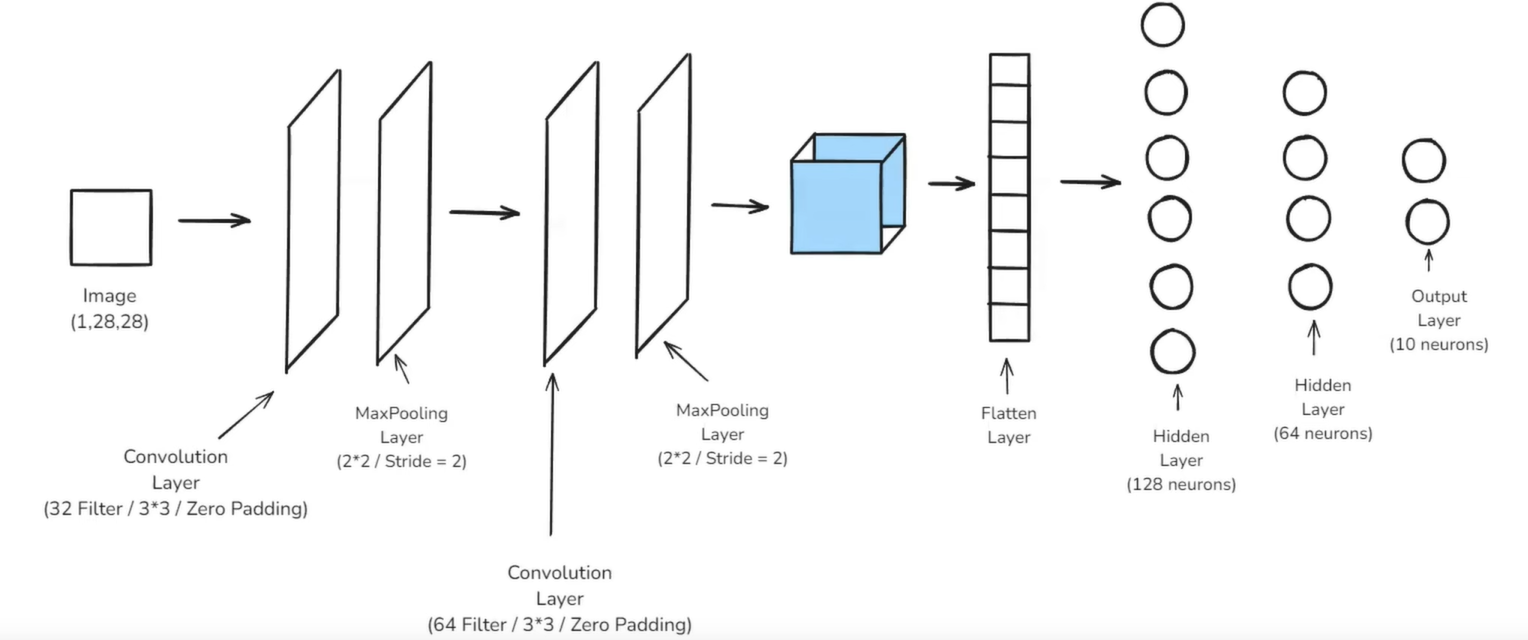

## Here we are going to hyperparamater tune the cnn
1. num_of_hidden_layer

2. num_of_conv_layer

3. neurons_per_layer

4. batch_size

5. dropout_rate

6. weight_decay

7. learning_rate

8. epoch

9. filter_size

10. optimizer

11. num_of_filter

In [43]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# For reproducability
torch.manual_seed(42)

In [4]:
# Load the fashoin mnist dataset
df = pd.read_csv("/content/drive/MyDrive/fashion-mnist_train.csv")

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(60000, 785)

In [7]:
# Check GPU Availability and define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


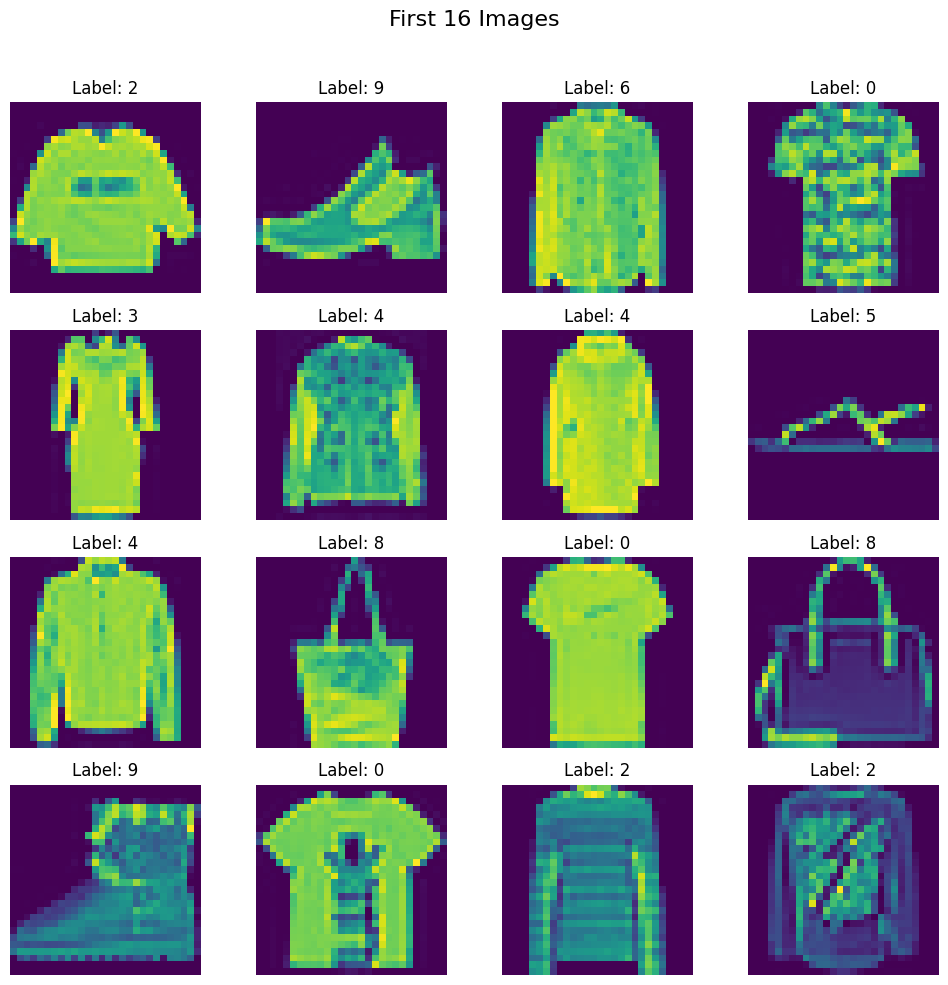

In [8]:
# This visualization code can be generated using deepseek/chatgpt ,
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

## Tran test split

In [9]:
x= df.iloc[:,1:].values
y=df.iloc[:,0].values

In [10]:
x.shape

(60000, 784)

In [11]:
y.shape

(60000,)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Normlization of pixel values

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [15]:
type(y_train)

numpy.ndarray

## Convert numpy arrays to pytorch tensors

In [16]:
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
x_test_tensor = torch.from_numpy(x_test).float()
y_test_tensor = torch.from_numpy(y_test).long()

In [17]:
type(x_train_tensor)

torch.Tensor

In [18]:
x_train_tensor


tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000]])

In [19]:
x_train_tensor[0].shape

torch.Size([784])

## Creating custom dataset class

In [44]:
class customdataset(Dataset): # Inherits the Dataset class

  def __init__(self ,x ,y):  # Constructor that defines how data should be loaded (Here features= x or inputs , lables = y/outputs)
    # syntax of reshape: Shape: (num_samples, 1, 28, 28)
    self.x = x.reshape(-1,1,28,28)  #Since shape of an image is 784(1d) but CNN need a 2d image
    self.y = y

  def __len__(self): #Returns the total number of samples/rows in the dataset
    return len(self.x)

  def __getitem__(self,index): # Returns the corresponding features(x) and labels(y) based on input index for creating batches
    return self.x[index] , self.y[index]


In [45]:
# Creating 2 objects of customdatasetclass
train_dataset = customdataset(x_train_tensor,y_train_tensor)
test_dataset = customdataset(x_test_tensor,y_test_tensor)

In [68]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

# Defining the dynamic neural network architecture

In [53]:
class cnnnetwork(nn.Module):

  def __init__(self,input_channel,num_conv_layer,num_hidden_layer,kernels_size,num_of_filter,image_size,num_class_labels,neurons_per_layer,dropout_rate):
    super().__init__()
    layers = []

    # Convolutional Layers and pooling layer
    for i in range(num_conv_layer):
      layers.append(nn.Conv2d(input_channel,out_channels = num_of_filter,kernel_size=kernels_size,padding='same'))
      layers.append(nn.ReLU())
      layers.append(nn.BatchNorm2d(num_of_filter))
      layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
      input_channel = num_of_filter
      image_size = image_size // 2  # Update image size after pooling

    # Flatten Layer
    layers.append(nn.Flatten())

    # Calculate the input size for the first fully connected layers
    fc_input_size = num_of_filter * (image_size ** 2)

    for i in range(num_hidden_layer):
      layers.append(nn.Linear(fc_input_size,neurons_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(p=dropout_rate))
      fc_input_size = neurons_per_layer

    #output layer
    layers.append(nn.Linear(neurons_per_layer,num_class_labels))

    self.model = nn.Sequential(*layers)

  def forward(self,x):
    return self.model(x)




## Define the objective fxn(for optuna) and Training pipeline

In [48]:
# Creating a loss function
loss_function = nn.CrossEntropyLoss()

In [63]:
def objective(trial):

  #Step-1 : Define Range of hyperparamater tuning
  num_conv_layer = trial.suggest_int('num_conv_layer',2,4)
  num_hidden_layer = trial.suggest_int("num_hidden_layer",2,4)
  neurons_per_layer = trial.suggest_int("neurons_per_layer",64,128,step = 8)
  epochs = trial.suggest_int('epoch',5,15,step = 2)
  learning_rate = trial.suggest_float('learning_rate',1e-5,1e-1,log=True)
  batch_size = trial.suggest_categorical('batch_size',[32,64,128])
  dropout_rate = trial.suggest_float('dropout_rate',0.2,0.5,step = 0.1)
  kernels_size = trial.suggest_categorical('kernels_size',[3,5])
  num_of_filter = trial.suggest_categorical('num_of_filter',[32,64,128])
  optimizer_name = trial.suggest_categorical('optimizer_name',['Adam','SGD','RMSprop'])
  weight_decay = trial.suggest_float("weight_decay",1e-5,1e-3,log=True) #range form 10^-5 to 10^-3



  #Step-2 Model object Initialization
  input_channel = 1 #NO_of_channel for gray scale image
  model = cnnnetwork(input_channel=input_channel,num_conv_layer=num_conv_layer,num_hidden_layer=num_hidden_layer,kernels_size=kernels_size,num_of_filter=num_of_filter,image_size=28,num_class_labels=10,neurons_per_layer=neurons_per_layer,dropout_rate=dropout_rate) # for grey scale image
  model= model.to(device) # move model to GPU

  # step-3 Paramater initialization (dataloader object,optimizer etc)
  if optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(),lr=learning_rate, weight_decay=weight_decay)  # Optimizer
  elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(),lr=learning_rate, weight_decay=weight_decay)
  else:
    optimizer = optim.RMSprop(model.parameters(),lr=learning_rate, weight_decay=weight_decay)

  # Train and test dataloader
  train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
  test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

  #step-4 Training Loop
  for epoch in range(epochs):
    model.train()

    for x,y in train_loader:

      x,y = x.to(device) , y.to(device)
      # forward pass
      y_pred=model(x)

      # loss calculate
      loss = loss_function(y_pred , y)

      #clear gradients
      optimizer.zero_grad()

      # backpass
      loss.backward()

      # update parameters
      optimizer.step()


  # Step-5 Model Evaluation on test data
  model.eval()
  total = 0 # keeps track of the total number of samples processed during the evaluation.
  correct = 0 #Keeps track the number of correct predictions
  with torch.no_grad(): #disable the gradient tracking while evaluating the model performance
    for x,y in test_loader:
      x,y = x.to(device) , y.to(device)

      #Forward pass / model prediction
      y_pred = model(x) #The output (y_pred) represents the predicted logits (raw scores)
      # computes the maximum value along dimension 1 (the class dimension) of the tensor y_pred.
      # It returns two things:
      # 1. The maximum values (the highest logit for each input in the batch).
      # 2. The indices of the maximum values (the predicted class labels).
      _,predicted = torch.max(y_pred ,1)

  # (predicted == y) compares the predicted labels (predicted) with the actual labels (y). It returns a boolean
  #tensor where True indicates a correct prediction and False indicates an incorrect prediction.
  #     .sum() counts the number of True values (correct predictions) in the batch.
  #     .item() converts the result to a Python integer.
  #     correct is incremented by this value to keep track of the total number of correct prediction
      total += y.shape[0]
      correct += (predicted ==y).sum().item()

  test_accuracy = correct/total


  #step-6 Model evaluation on training data
  total1 = 0
  correct1 = 0
  with torch.no_grad():
    for x,y in train_loader:
      x,y = x.to(device),y.to(device)

      #forward pass
      y_pred1 = model(x)

      _,predicted1 = torch.max(y_pred1,1)

      total1 = total1 + y.shape[0]
      correct1 += (predicted1 == y).sum().item()

  print(f"Train Accuracy: {correct1/total1}")
  print(f"Test Accuracy: {test_accuracy}")


  return test_accuracy




# Creating a study object

In [32]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.6 MB/s eta 0:00:00


In [64]:
import optuna
study = optuna.create_study(direction='maximize') # We aim to maximize accuracy
study.optimize(objective,n_trials=15)

[I 2025-02-28 10:44:15,276] A new study created in memory with name: no-name-e2eb239f-7a3e-43c5-9b4c-aed477d4efae
[I 2025-02-28 10:44:55,810] Trial 0 finished with value: 0.9068333333333334 and parameters: {'num_conv_layer': 4, 'num_hidden_layer': 3, 'neurons_per_layer': 96, 'epoch': 7, 'learning_rate': 3.529750176687901e-05, 'batch_size': 64, 'dropout_rate': 0.5, 'kernels_size': 3, 'num_of_filter': 128, 'optimizer_name': 'Adam', 'weight_decay': 0.0008116384647193658}. Best is trial 0 with value: 0.9068333333333334.


Train Accuracy: 0.9321666666666667
Test Accuracy: 0.9068333333333334


[I 2025-02-28 10:45:25,825] Trial 1 finished with value: 0.8960833333333333 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 3, 'neurons_per_layer': 88, 'epoch': 9, 'learning_rate': 0.017048133513663844, 'batch_size': 64, 'dropout_rate': 0.2, 'kernels_size': 5, 'num_of_filter': 32, 'optimizer_name': 'SGD', 'weight_decay': 1.196505294356751e-05}. Best is trial 0 with value: 0.9068333333333334.


Train Accuracy: 0.9305625
Test Accuracy: 0.8960833333333333


[I 2025-02-28 10:46:29,701] Trial 2 finished with value: 0.4488333333333333 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 3, 'neurons_per_layer': 72, 'epoch': 13, 'learning_rate': 0.017493343721602106, 'batch_size': 128, 'dropout_rate': 0.4, 'kernels_size': 3, 'num_of_filter': 128, 'optimizer_name': 'RMSprop', 'weight_decay': 1.9977210275577385e-05}. Best is trial 0 with value: 0.9068333333333334.


Train Accuracy: 0.45310416666666664
Test Accuracy: 0.4488333333333333


[I 2025-02-28 10:47:05,259] Trial 3 finished with value: 0.9180833333333334 and parameters: {'num_conv_layer': 2, 'num_hidden_layer': 3, 'neurons_per_layer': 72, 'epoch': 7, 'learning_rate': 6.341928830677094e-05, 'batch_size': 64, 'dropout_rate': 0.30000000000000004, 'kernels_size': 3, 'num_of_filter': 128, 'optimizer_name': 'RMSprop', 'weight_decay': 0.0002953705882606251}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.9516041666666667
Test Accuracy: 0.9180833333333334


[I 2025-02-28 10:47:22,682] Trial 4 finished with value: 0.7935 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 3, 'neurons_per_layer': 120, 'epoch': 5, 'learning_rate': 0.0034865425504330234, 'batch_size': 64, 'dropout_rate': 0.5, 'kernels_size': 3, 'num_of_filter': 32, 'optimizer_name': 'SGD', 'weight_decay': 0.0002704932076911792}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.8000416666666667
Test Accuracy: 0.7935


[I 2025-02-28 10:48:08,762] Trial 5 finished with value: 0.895 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 3, 'neurons_per_layer': 72, 'epoch': 7, 'learning_rate': 0.00022918689989494918, 'batch_size': 32, 'dropout_rate': 0.5, 'kernels_size': 3, 'num_of_filter': 32, 'optimizer_name': 'Adam', 'weight_decay': 0.00012114955409284439}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.9127916666666667
Test Accuracy: 0.895


[I 2025-02-28 10:48:44,121] Trial 6 finished with value: 0.9111666666666667 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 3, 'neurons_per_layer': 104, 'epoch': 5, 'learning_rate': 0.0007859676645924055, 'batch_size': 32, 'dropout_rate': 0.30000000000000004, 'kernels_size': 5, 'num_of_filter': 32, 'optimizer_name': 'Adam', 'weight_decay': 0.00013477333169273977}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.9326041666666667
Test Accuracy: 0.9111666666666667


[I 2025-02-28 10:49:04,202] Trial 7 finished with value: 0.34658333333333335 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 4, 'neurons_per_layer': 128, 'epoch': 9, 'learning_rate': 0.001424827866231506, 'batch_size': 128, 'dropout_rate': 0.5, 'kernels_size': 5, 'num_of_filter': 32, 'optimizer_name': 'SGD', 'weight_decay': 0.00010815853185069752}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.343875
Test Accuracy: 0.34658333333333335


[I 2025-02-28 10:50:03,368] Trial 8 finished with value: 0.918 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 3, 'neurons_per_layer': 96, 'epoch': 9, 'learning_rate': 0.0009774876996233336, 'batch_size': 32, 'dropout_rate': 0.4, 'kernels_size': 3, 'num_of_filter': 32, 'optimizer_name': 'Adam', 'weight_decay': 8.777124916994416e-05}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.9379791666666667
Test Accuracy: 0.918


[I 2025-02-28 10:50:19,690] Trial 9 finished with value: 0.8943333333333333 and parameters: {'num_conv_layer': 3, 'num_hidden_layer': 3, 'neurons_per_layer': 80, 'epoch': 9, 'learning_rate': 0.09328786848188879, 'batch_size': 128, 'dropout_rate': 0.2, 'kernels_size': 3, 'num_of_filter': 32, 'optimizer_name': 'SGD', 'weight_decay': 0.0009106208609619291}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.9180416666666666
Test Accuracy: 0.8943333333333333


[I 2025-02-28 10:51:07,556] Trial 10 finished with value: 0.915 and parameters: {'num_conv_layer': 2, 'num_hidden_layer': 2, 'neurons_per_layer': 64, 'epoch': 15, 'learning_rate': 1.6444511157123116e-05, 'batch_size': 64, 'dropout_rate': 0.30000000000000004, 'kernels_size': 5, 'num_of_filter': 64, 'optimizer_name': 'RMSprop', 'weight_decay': 3.9106475248895706e-05}. Best is trial 3 with value: 0.9180833333333334.


Train Accuracy: 0.9438541666666667
Test Accuracy: 0.915


[I 2025-02-28 10:52:19,989] Trial 11 finished with value: 0.9235833333333333 and parameters: {'num_conv_layer': 2, 'num_hidden_layer': 4, 'neurons_per_layer': 104, 'epoch': 11, 'learning_rate': 8.152849829360229e-05, 'batch_size': 32, 'dropout_rate': 0.4, 'kernels_size': 3, 'num_of_filter': 128, 'optimizer_name': 'RMSprop', 'weight_decay': 0.00030989750516796703}. Best is trial 11 with value: 0.9235833333333333.


Train Accuracy: 0.9715208333333333
Test Accuracy: 0.9235833333333333


[I 2025-02-28 10:53:46,817] Trial 12 finished with value: 0.9184166666666667 and parameters: {'num_conv_layer': 2, 'num_hidden_layer': 4, 'neurons_per_layer': 112, 'epoch': 13, 'learning_rate': 8.909008453755762e-05, 'batch_size': 32, 'dropout_rate': 0.30000000000000004, 'kernels_size': 3, 'num_of_filter': 128, 'optimizer_name': 'RMSprop', 'weight_decay': 0.00037180881511370283}. Best is trial 11 with value: 0.9235833333333333.


Train Accuracy: 0.9808541666666667
Test Accuracy: 0.9184166666666667


[I 2025-02-28 10:55:19,653] Trial 13 finished with value: 0.9223333333333333 and parameters: {'num_conv_layer': 2, 'num_hidden_layer': 4, 'neurons_per_layer': 112, 'epoch': 13, 'learning_rate': 0.00014563134257689566, 'batch_size': 32, 'dropout_rate': 0.4, 'kernels_size': 3, 'num_of_filter': 128, 'optimizer_name': 'RMSprop', 'weight_decay': 0.00039048332347186866}. Best is trial 11 with value: 0.9235833333333333.


Train Accuracy: 0.9763541666666666
Test Accuracy: 0.9223333333333333


[I 2025-02-28 10:56:46,915] Trial 14 finished with value: 0.9238333333333333 and parameters: {'num_conv_layer': 2, 'num_hidden_layer': 4, 'neurons_per_layer': 112, 'epoch': 13, 'learning_rate': 0.00020427938578637404, 'batch_size': 32, 'dropout_rate': 0.4, 'kernels_size': 3, 'num_of_filter': 128, 'optimizer_name': 'RMSprop', 'weight_decay': 0.0004640613431093915}. Best is trial 14 with value: 0.9238333333333333.


Train Accuracy: 0.9719791666666666
Test Accuracy: 0.9238333333333333


In [65]:
study.best_value

0.9238333333333333

In [66]:
study.best_params

{'num_conv_layer': 2,
 'num_hidden_layer': 4,
 'neurons_per_layer': 112,
 'epoch': 13,
 'learning_rate': 0.00020427938578637404,
 'batch_size': 32,
 'dropout_rate': 0.4,
 'kernels_size': 3,
 'num_of_filter': 128,
 'optimizer_name': 'RMSprop',
 'weight_decay': 0.0004640613431093915}

## After hyperparamater tunning:
Training accuracy = 97.1 % and Test accuracy = 92.3 % , The difference between them is 4.8% .. A small gap (≤5%) generally indicates good generalization, so our model is not significantly overfitting .